<a href="https://colab.research.google.com/github/YoshiakiAsahara/colob-python/blob/main/%E6%A9%9F%E4%BC%9A%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn as mg
import seaborn as sns

In [10]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
def plot(df=pd.DataFrame()):
  handle=pd.DataFrame(['pairplot','hist','kde','count','box','violin','categolized_hist'])
  print(df.columns,np.arange(len(handle)))
  clm=int(input('列番号を指定'))
  print(handle)
  print()


  hdl=int(input('処理番号を指定'))
  df.iloc[:,clm]
  if hdl ==0 :
    sns.pairplot(df)
  elif hdl == 1 :
    sns.displot(data=df, x=df.columns[clm], kind='hist')
  elif hdl == 2 :
    sns.displot(data=df, x=df.columns[clm], kind='kde')
  elif hdl == 3 :
    sns.countplot(df, x=df.columns[clm])
  elif hdl == 4 :
    sns.boxplot(df, showmeans=True)
  elif hdl == 5 :
    sns.violinplot(df)
  elif hdl == 6 :
    print(df.columns)
    N=input('カテゴリ変数名')
    sns.displot(data=df, x=df.iloc[:,clm], kind='hist', hue=N)
  else :
    print('dn')

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0 )

train_test_split関数はデータをシャッフルしてテストデータ（目的変数）とトレインデータ（説明変数）に分離

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


In [ ]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object') [0 1 2 3 4 5 6]
列番号を指定0
                  0
0          pairplot
1              hist
2               kde
3             count
4               box
5            violin
6  categolized_hist

処理番号を指定0


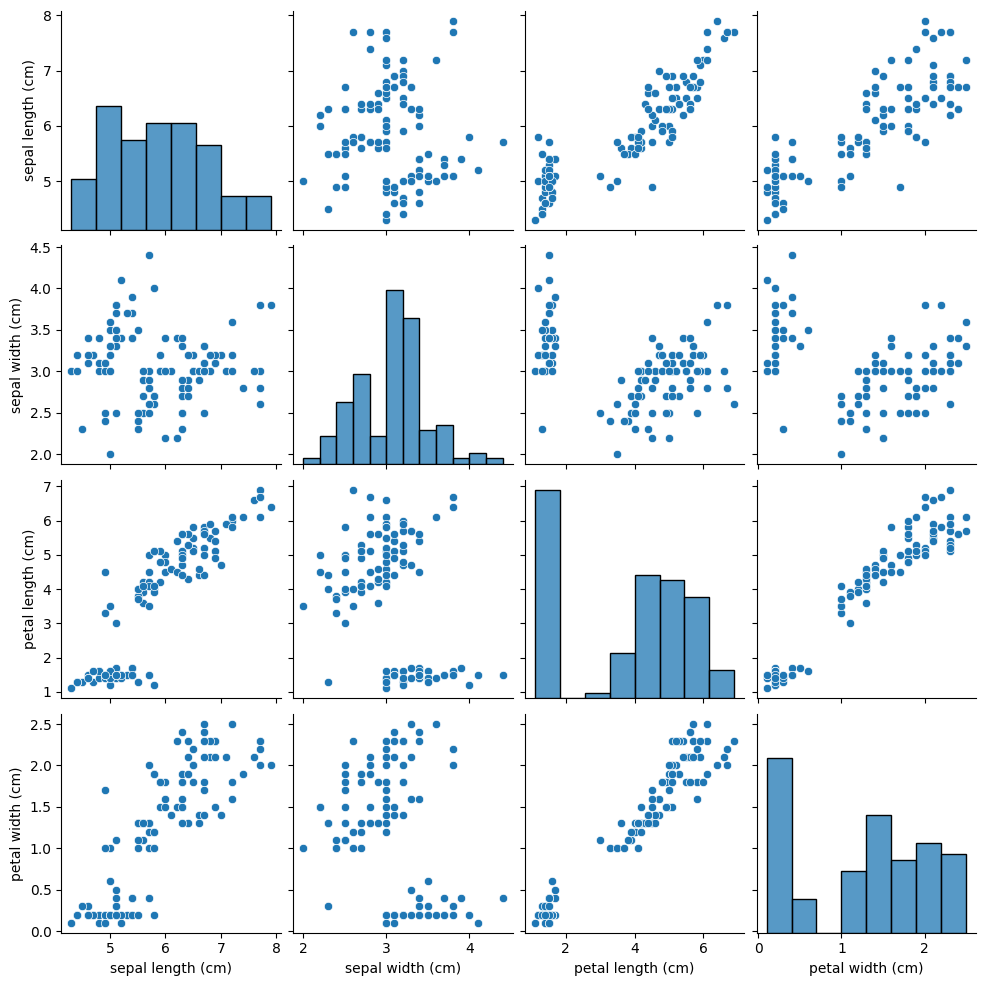

In [ ]:
plot(iris_dataframe)

K最近傍法を実装n_neighborsが中心点の数

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#fitの返り値
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
print(knn.score(X_test, y_test))

0.9736842105263158


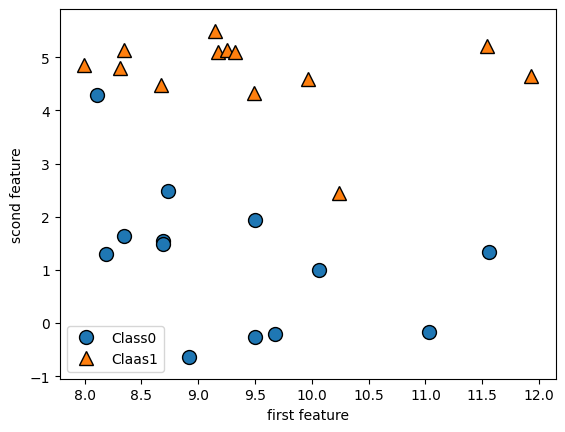

In [ ]:
import matplotlib.pyplot as plt
X, y = mg.datasets.make_forge()
mg.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class0', 'Claas1'])
plt.xlabel('first feature')
plt.ylabel('scond feature')
plt.show()

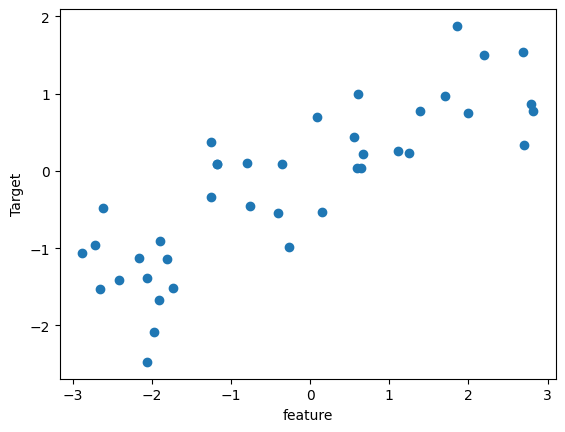

In [ ]:
X, y =mg.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlabel('feature')
plt.ylabel('Target')
plt.show()

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer.data.shape

(569, 30)

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

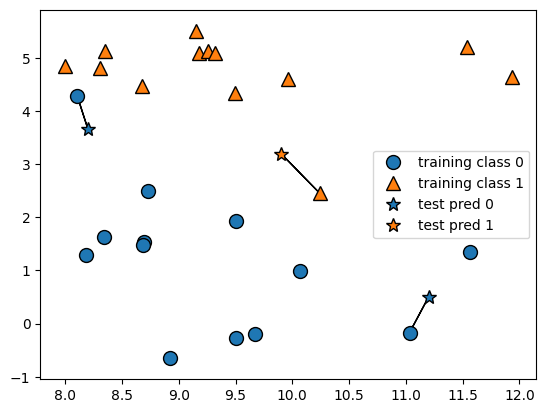

In [12]:
mg.plots.plot_knn_classification(n_neighbors=1)

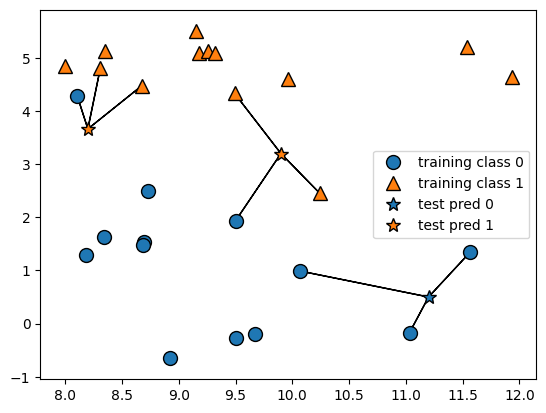

In [13]:
mg.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.model_selection import train_test_split
X, y = mg.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [26]:
clf.score(X_test, y_test)

0.8571428571428571

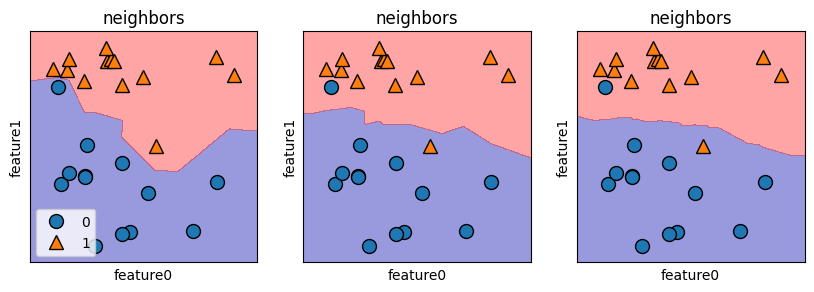

In [38]:
from sklearn.neighbors import KNeighborsClassifier
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mg.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title('neighbors')
  ax.set_xlabel('feature0')
  ax.set_ylabel('feature1')
  axes[0].legend(loc=3)


最近傍点が多いほど決定境界が滑らかになり、単純なモデルに対応し、最近傍点が少ないほど訓練データに近付くため、複雑なモデルに対応する。